# Felipe Zambrini Santos

# Importing the libraries


In [32]:
# Importing libraries
import numpy as np
import math
import sympy as sympy

# Code to calculate the matrix determinant (DETGPENTA)
The determinant code was made by the symbolic method. However, we encounter problems when using floats arrays or any numpy array. Only works with classics integer arrays.
Here is the matrix conventions and the code implemented from the paper.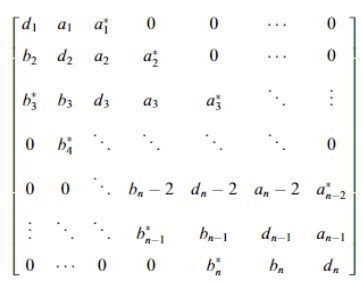
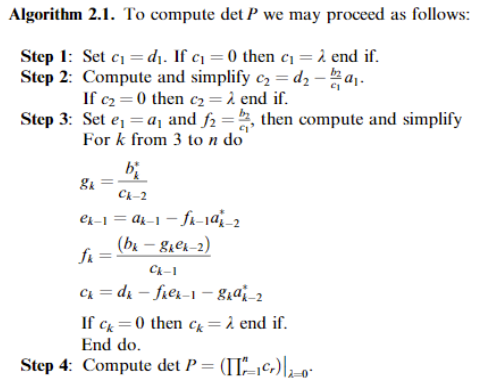

In [33]:
#CE5310 Project
#Felipe Zambrini Santos
#DETGPENTA - CALCULATING THE DETERMINANT
#From Article reference [16]: "A fast and reliable algorithm for evaluatingnth orderpentadiagonal determinants, from Moawwad E.A. El-Mikkawy"

#Defining the DETGPENTA function
#Algorithm 2.1
def DETGPENTA(n, b_star, b, d, a, a_star): 
    
    #Where n is the matrix size
    # b_star is the second diagonal below the principal diagonal
    # b is the first diagonal below the principal diagonal
    # d is the principal diagonal
    # a is the first diagonal above the principal diagonal
    # a_star is the second diagonal above the principal diagonal
    
    c = sympy.zeros(1,n)
    e = sympy.zeros(1,n)
    f = sympy.zeros(1,n)
    g = sympy.zeros(1,n)
    x = sympy.zeros(1,n)
   
    x = symbols('x')
   
    # STEP 1
    c[0] = d[0]
    if c[0] == 0:
        c[0] = x

    # STEP 2
    c[1] = d[1] - (b[1] / c[0]) * a[0]
    if c[1] == 0:
        c[1] = x

    # STEP 3
    e[0] = a[0]
    f[1] = b[1] / c[0]
    
    for k in range(2,n):
        g[k] = b_star[k] / c[k-2]
        e[k-1] = a[k-1] - f[k-1] * a_star[k-2]
        f[k] = (b[k] - g[k] * e[k-2]) / c[k-1]
        c[k] = d[k] - f[k] * e[k-1] - g[k] * a_star[k-2]
        
        if c[k] == 0:
            c[k] = x
            
    # STEP 4
    result = c[0]
    #Calculation the productory
    for i in range(1,n):
        result = result*c[i]
    
    result = expand(result) #Expanding the expression so there are no symbols in the denominator
    
    return result.subs(x, 0) # Substituting the x symbols for zeros

# Code to calculate the system answer (PTRANS-I)
Where, to calculate correctly te answer, in the step 5 in the paper was written Z(n-2) in the right hand side was suppose to be Z(n-3), and where was written Z(n-1) in the right hand side was suppose to be Z(n-2). Leonardo Wei was the person who figure it out, and as we are co-workes in HPNE Lab he assisted me on that.
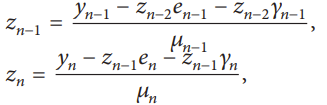

Also, when I runned the code as a numercial method it was giving divisions by zeros, so Leonardo helped me to implement the symbolic method to avoid those issues.

# Conventional matrices
PLS Matrix
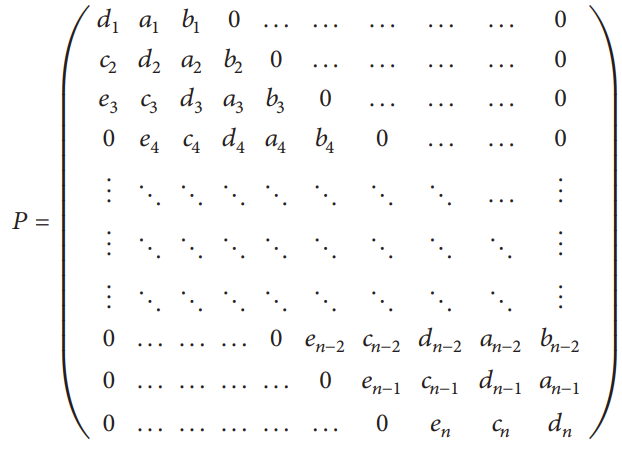
Vector Matrix
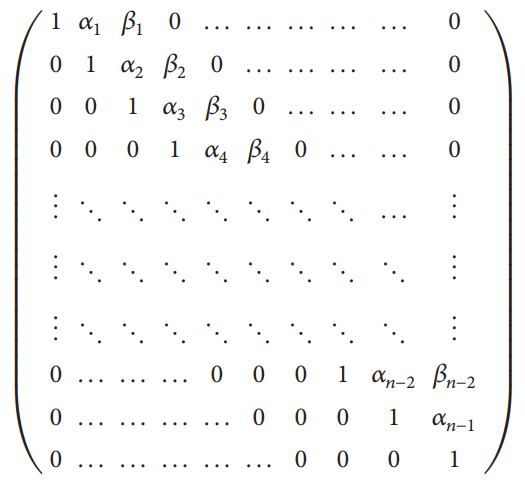
Algorithm 1: First numerical algorithm for solving pentadiagonal linear system
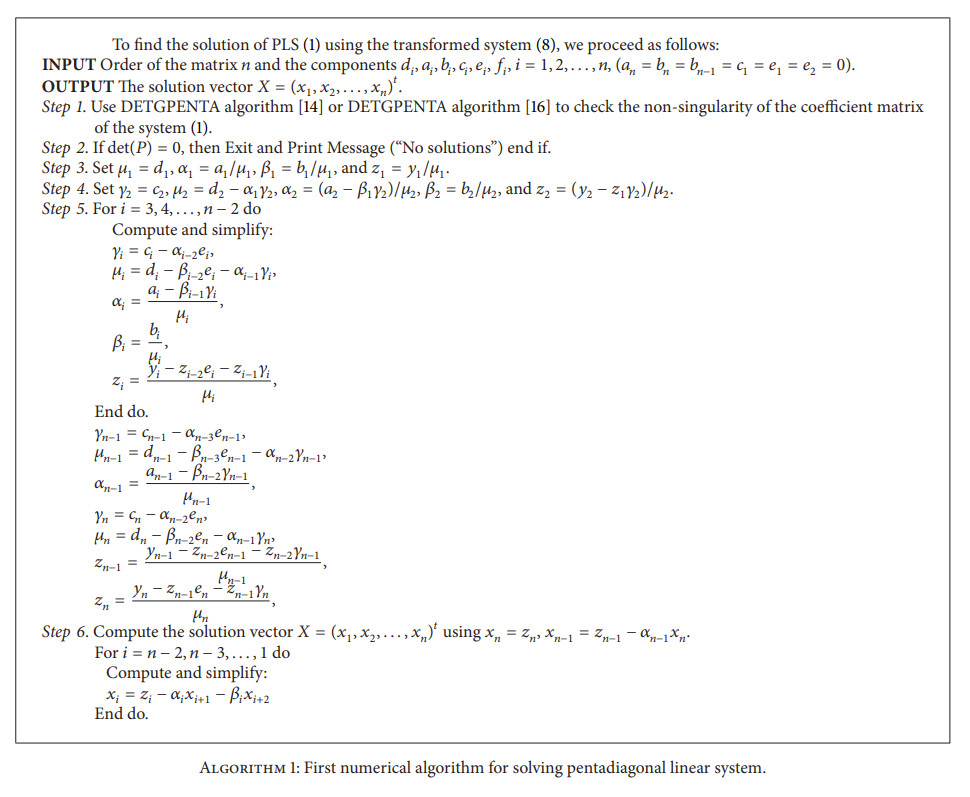

In [36]:
#Defining the Pentadiagonal Linear System function from the paper
#PLS_aux was defined to use inside the main function (PLS) so we could separate the .csv import from the actual algorithm
def PLS_aux(n,e,c,d,a,b,y):
    #Where n is the matrix size
    # e is the second diagonal below the principal diagonal
    # c is the first diagonal below the principal diagonal
    # d is the principal diagonal
    # a is the first diagonal above the principal diagonal
    # b is the second diagonal above the principal diagonal
    
    #Step 1: Calculating the determinant
    det = DETGPENTA(n,e,c,d,a,b)
    #Step 2: Checking if the determinant is zero
    if(det == 0):
        print('NO SOLUTIONS')
        
        
    #Defining the vectors to solve the pentadiagonal matrix
    u = sympy.zeros(1,n)
    alpha = sympy.zeros(1,n)
    beta = sympy.zeros(1,n)
    z = sympy.zeros(1,n)
    gama = sympy.zeros(1,n)
    x = sympy.zeros(1,n)
    #Defining the symbolic variable
    symb=sympy.symbols('symb')
    
    #Step 3: Defining the initial vectors
    u[0] = d[0]
    #Avoiding divisions by zero by using the symbolic method
    if u[0]==0:
        u[0]=symb
    alpha[0] = a[0] / u[0]
    beta[0] = b[0] / u[0]
    z[0] = y[0] / u[0]
    
    #Step4: Defining the second vectors
    gama[1] = c[1]
    u[1] = d[1] - (alpha[0] * gama[1])
    #Avoiding divisions by zero by using the symbolic method
    if u[1]==0:
        u[1]=symb
    alpha[1] = (a[1] - beta[0] * gama[1]) / u[1]
    beta[1] = b[1] / u[1]
    z[1] = (y[1] - z[0] * gama[1]) / u[1]
    
    #Step5: Computing all the vectors from the third to last term
    for i in range(2,n-2):
        gama[i] = c[i] - alpha[i-2] * e[i]
        u[i] = d[i] - beta[i-2] * e[i] - alpha[i-1] * gama[i]
        #Avoiding divisions by zero by using the symbolic method
        if u[i]==0:
            u[i]=symb
        alpha[i] = (a[i] - beta[i-1] * gama[i]) / u[i]
        beta[i] = b[i] / u[i]
        z[i] = (y[i] - z[i-2] * e[i] - z[i-1] * gama[i]) / u[i]
        
    gama[n-2] = c[n-2] - alpha[n-4] * e[n-2]
    u[n-2] = d[n-2] - beta[n-4] * e[n-2] - alpha[n-3] * gama[n-2]
    #Avoiding divisions by zero by using the symbolic method
    if u[n-2]==0:
        u[n-2]=symb
    alpha[n-2] = (a[n-2] - beta[n-3] * gama[n-2]) / u[n-2]
    gama[n-1] = c[n-1] - alpha[n-3] * e[n-1]
    u[n-1] = d[n-1] - beta[n-3] * e[n-1] - alpha[n-2] * gama[n-1]
    #Avoiding divisions by zero by using the symbolic method
    if u[n-1]==0:
        u[n-1]=symb
    z[n-2] = (y[n-2] - z[n-4]*e[n-2] - z[n-3] * gama[n-2]) / u[n-2]
    z[n-1] = (y[n-1] - z[n-3]*e[n-1] - z[n-2]*gama[n-1])/u[n-1]
    
    # Step 6: Computing the solution vector
    x[n-1] = z[n-1]
    x[n-2] = z[n-2] - alpha[n-2]*x[n-1]
    
    # Computing and simplifying
    for i in np.arange(n-3,-1,-1):
        x[i] = z[i] - alpha[i] * x[i+1] - beta[i] * x[i+2]
            
    # Substituting the x symbols for zeros
    x_final=sympy.zeros(1,n)
    for i in np.arange(0,n):
        x_final[i]=sympy.simplify(x[i])
        x_final[i]=x_final[i].subs({symb:0})
    return x_final

#Defining the PLS function that will get the values from the .csv file
def PLS(nome_do_arquivo):
    # Command to open the .csv file
    file = open(nome_do_arquivo)
    # Defining the matrix from the .csv file
    matriz_do_sistema = np.loadtxt(file, delimiter=",")
    
    #Reading the matrix rows
    n_rows = matriz_do_sistema.shape[0]
    #Reading the matrix columns
    n_columns = matriz_do_sistema.shape[1]
    
    #Reading the second diagonal below the principal diagonal
    e = np.zeros(n_rows)
    for i in range(2, n_rows):
        e[i] = matriz_do_sistema[i][i-2]
       
    #Reading the first diagonal below the principal diagonal
    c = np.zeros(n_rows)
    for i in range(1, n_rows):
        c[i] = matriz_do_sistema[i][i-1]
        
    #Reading the principal diagonal
    d = np.zeros(n_rows)
    for i in range(0, n_rows):
        d[i] = matriz_do_sistema[i][i]
        
    #Reading the first diagonal above the principal diagonal
    a = np.zeros(n_rows)
    for i in range(0, n_rows-1):
        a[i] = matriz_do_sistema[i][i+1]
    
    #Reading the second diagonal above the principal diagonal
    b = np.zeros(n_rows)
    for i in range(0, n_rows-2):
        b[i] = matriz_do_sistema[i][i+2]
    
    #Reading the last column as the RHS
    y = np.zeros(n_rows)
    for i in range(0,n_rows):
        y[i] = matriz_do_sistema[i][n_columns-1]
        
    return PLS_aux(n_rows,e,c,d,a,b,y)

# So far we just defined the functions. Now we are going to define the parameters and execute them all

In [37]:
#Executing the PLS function
#Getting the matrix from the .csv file
NM_project_paper_example_matrix = "NM_project_random_matrix.csv"
solution = PLS(NM_project_paper_example_matrix)
print("Solution from PTRANS-I = ",solution)

Solution from PTRANS-I =  Matrix([[1.00000000000000, 0.500000000000000, -0.500000000000000, 0, -0.500000000000000, 1.50000000000000]])


# Using the SOR function from Dr. Uddameri's website to solve the system

In [39]:
#Function for Solving System of Equations 
# using Successive Over-relaxation
# Venki Uddameri

# import libraries
import numpy as np

# define function
# M is the coeff matrix; b is RHS matrix, x is the initial guesses
# tol is acceptable tolerance and Nmax = max. iterations

def sor(M,b,x,w,tol,Nmax):
    N = len(M)  # length of the coefficient matrix
    C = np.zeros((N,N)) # initialize iteration coeff matrix
    d = np.zeros(N) # initiation iteration RHS matrix
    # Create iteration matrix
    for i in np.arange(0,N,1):
        pvt = M[i,i]  # identify the pivot element
        C[i,:] = -M[i,:]/pvt # divide coefficient by pivot
        C[i,i] = 0 # element the pivot element
        d[i] = b[i]/pvt # divide RHS by Pivot element
        
    # Perform iterations
    res = 100 # create a high res so there is at least 1 iteration
    iter = 0 #initialize iteration
    xold = x # initialize xold
    # iterate when residual > tol or iter <= max iterations
    while(res > tol and iter <= Nmax):
        for i in np.arange(0,N,1):  # loop through all unknowns
            x[i] = (1-w)*xold[i] + w*(d[i] + sum(C[i,:]*x)) # estimate new values
        res = np.sum(np.abs(np.matmul(M,x) - b)) # compute res
        iter = iter + 1 # update residual
        xold = x
    return(x)

In [40]:
#Importing the matrix from a .csv file
file = open("NM_project_random_matrix.csv")
nome_do_arquivo = "NM_project_random_matrix.csv"
numpy_array = np.loadtxt(file, delimiter=",")

#Defining a variable to the .csv which contains the matrix
file = open(nome_do_arquivo)
csv_matrix = np.loadtxt(file, delimiter=",")

#Reading the matrix rows
n_rows = csv_matrix.shape[0]

#Reading the matrix columns
n_columns = csv_matrix.shape[1]

#Reading the last column of the matrix wich reffers to the right hand side of the system
b = csv_matrix[0:n_rows, n_columns-1]

#Delimitating the system matrix, which does not count the last column
system_matrix = csv_matrix[0:n_rows, 0:n_columns-1]

initial_guess = np.zeros(n_rows) # Initial Guesses
w = 1.5
Nmax = 1  # Max. Number of iteration
tol = 1e-03 # Absolute tolerance

X = sor(system_matrix,b,initial_guess,w,tol,Nmax) # Applying the function
print('The SOR solution is: ', X)

The SOR solution is:  [  2.4375      -6.           6.703125     1.171875   -12.2109375
  17.09765625]


# Using the biult-in function to solve the system 


We need to solve the sysetm Ax = b. So the numpy built-in function receives the matrix A and the RHS b. We call this function as: numpy.linalg.solve(A, b) or np.linalg.solve(A,b).

In [41]:
#Biult-in function

#The .csv file contains the system matrix and the result matrix in the last column

#Defining a variable to the .csv which contains the matrix
csv_file = "NM_project_random_matrix.csv"

#Command to open the .csv file
file = open(csv_file)

#Defining the numpy matrix from the .csv, which the columns are delimited with commas
csv_matrix = np.loadtxt(file, delimiter=",")

#Reading the matrix rows
n_rows = csv_matrix.shape[0]
#Reading the matrix columns
n_columns = csv_matrix.shape[1]

#Reading the last column of the matrix wich reffers to the right hand side of the system
b = csv_matrix[0:n_rows, n_columns-1]
#Delimitating the system matrix, which does not count the last column
system_matrix = csv_matrix[0:n_rows, 0:n_columns-1]

#Calculating and printing the solution from the Python biult-in function
solution_x = np.linalg.solve(system_matrix,b)
print('Biult-in solution = ', solution_x)

Biult-in solution =  [ 1.   0.5 -0.5  0.  -0.5  1.5]
